In [1]:
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import os

In [2]:
sns.set(color_codes = True)

In [3]:
# Reading Image

In [4]:
image = cv2.imread('dataset/single_pred/apple_or_banana7.jfif')

In [52]:
def edgeDetect(image):
    
    print("Original Image:")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("Grayscale: ")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    plt.imshow(gray)
    plt.show()
    
    mat_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])
    mat_x = np.array([[ -1, 0, 1], 
                       [ 0, 0, 0], 
                       [ 1, 2, 1]])
    
    print("Filter1: ")
    filtered_image = cv2.filter2D(gray, -1, mat_y)
    plt.imshow(filtered_image, cmap='gray')
    plt.show()
    
    print("Filter2: ")
    filtered_image2 = cv2.filter2D(gray, -1, mat_x)
    plt.imshow(filtered_image2, cmap='gray')
    plt.show()
    
    print("Edges: ")
    plt.imshow(filtered_image2 - filtered_image, cmap='gray')
    plt.show()
    
    return filtered_image2 - filtered_image

In [55]:
def grayScale(image):
    
    print("Original Image:")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    
    print("Grayscale: ")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
    plt.imshow(gray)
    plt.show()
    
    

Original Image:


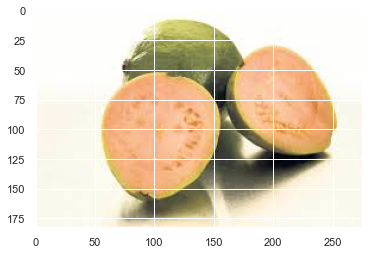

Grayscale: 


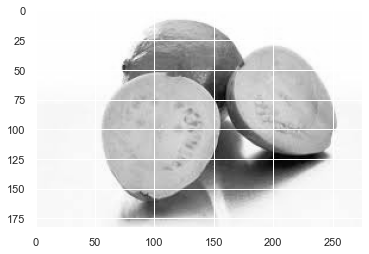

Filter1: 


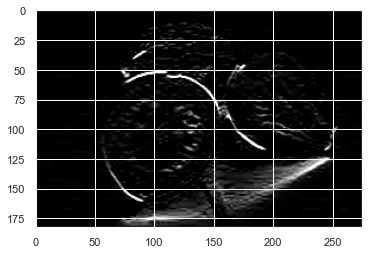

Filter2: 


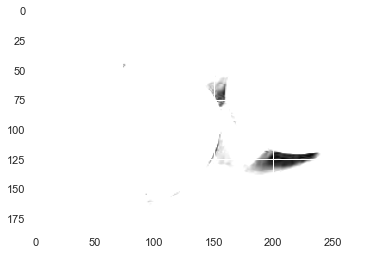

Edges: 


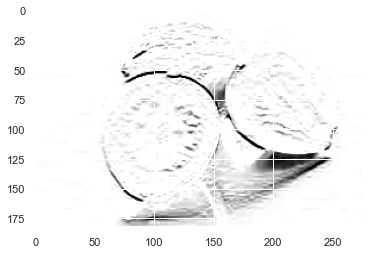

In [6]:
edge = edgeDetect(image)

In [37]:
testPath = 'dataset/output/test/'
trainPath = 'dataset/output/train/'

In [41]:
test = []
train = []

In [42]:
fruits = os.listdir(testPath)
for fruit in fruits:
    images = os.listdir(testPath + "/" + fruit)
    for img in images:
        test.append(cv2.imread(testPath + "/" + fruit + "/" + img))
        
fruits = os.listdir(trainPath)
for fruit in fruits:
    images = os.listdir(trainPath + "/" + fruit)
    for img in images:
        train.append(cv2.imread(trainPath + "/" + fruit + "/" + img))

Original Image:


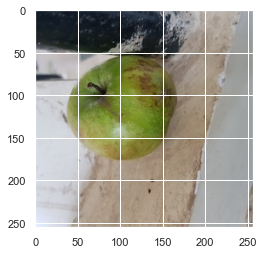

Grayscale: 


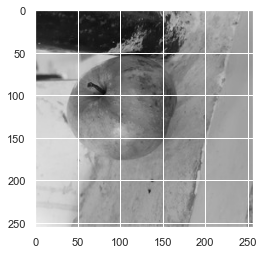

Filter1: 


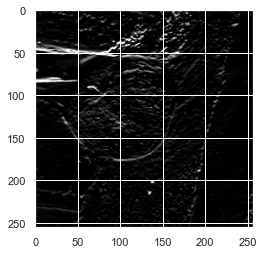

Filter2: 


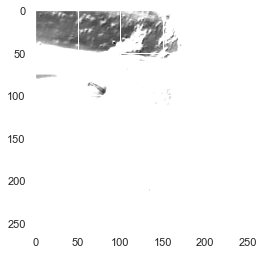

Edges: 


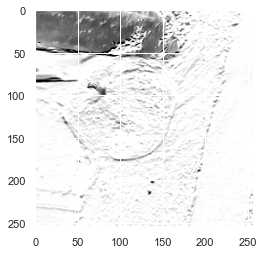

In [53]:
im = edgeDetect(test[5])

In [50]:
im

array([[164, 152, 136, ..., 255, 255, 255],
       [140, 134, 122, ..., 255, 255, 255],
       [132, 123, 114, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 243, 241],
       [255, 255, 255, ..., 240, 252, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

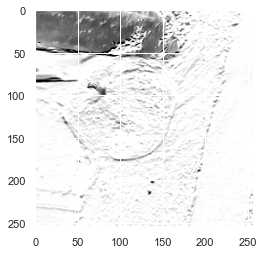

In [54]:
plt.imshow(im)